### Findings

- There are **757904** unique orders over the 6 month period from 01-Jan-2016 to 30-June-2016.


- Simultaneous orders (at the same time) can be made by different customers at the same exact second of time.


- Out of 10463 items, **623** products remained unsold over the 6 month period. That doesn't mean they will not get purchased in the upcoming 2 weeks.


- Up to 100 units (also 20, 30 and 60 units) of a single product was purchased.


- The two most popular items, Item 5035 and 7789 had over 10000 units purchased.


### Tasks


- Completed univariate exploration of the `orders` dataset, although not in depth.


- Determined all the scenarios of customer purchases that can be observed in the `orders` dataset.


**Ismail Dawoodjee | 8:42 PM 04-June-2020**

# Data Exploration Part 4

This notebook will explore the third and final dataset called `orders`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'whitegrid')

In [2]:
orders = pd.read_pickle('orders.pkl')

In [4]:
orders.shape

(2181955, 5)

In [5]:
orders.columns

Index(['time', 'transactID', 'itemID', 'order', 'salesPrice'], dtype='object')

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181955 entries, 0 to 2181954
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   time        datetime64[ns]
 1   transactID  int64         
 2   itemID      int64         
 3   order       int64         
 4   salesPrice  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 83.2 MB


In [7]:
orders.describe()

,transactID,itemID,order,salesPrice
count,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06
mean,1.073262e+06,5.247717e+03,1.244553e+00,3.668124e+01
std,6.312578e+05,2.454623e+03,6.665127e-01,1.261080e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.313775e+05,3.605000e+03,1.000000e+00,7.120000e+00
50%,1.065659e+06,5.200000e+03,1.000000e+00,1.668000e+01
75%,1.600670e+06,7.314000e+03,1.000000e+00,3.462000e+01
max,2.294042e+06,1.046300e+04,1.000000e+02,9.387020e+03


In [20]:
orders

,time,transactID,itemID,order,salesPrice
0,2018-01-01 00:01:56,2278968,450,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47
3,2018-01-01 00:09:24,2278968,450,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19
...,...,...,...,...,...
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73


### Variable `time`

The variable `time` indicates the exact time stamp of a product purchase.

In [14]:
orders.iloc[-1,0] - orders.iloc[0,0]

Timedelta('179 days 23:55:05')

In [27]:
orders['time'].nunique()

757904

- There are 757904 unique orders over a period of 6 months, starting from 01-Jan-2018 to 29-Jun-2018.

### Variable `transactID`

The variable `transactID` is a transaction ID number to track the orders of different products by a single customer in a single shopping session. For example, a customer can purchase and order products at 4 pm, and then again at 4:15 pm without logging out (e.g. by pressing the "continue shopping" button after making the 4 pm order). The two orders will have different timestamps but the same transaction ID. However, multiple customers can make orders at the same time, resulting in different transaction IDs in the same timestamp. All 8 possible scenarios are outlined below, according to my own understanding:


- Same time, same transactID, same itemID: single order by a single customer purchasing multiple of the same item (order number > 1)
- Same time, same transactID, diff itemID__: single order by a single customer purchasing multiple items
- Same time, diff transactID, same itemID__: multiple customers ordering the same item at the same time
- Same time, diff transactID, diff itemID____: multiple customers ordering different items at the same time
- Diff time, same transactID, same itemID__: multiple orders (at different times) by a single customer purchasing the same item without logging out.
- Diff time, same transactID, diff itemID____: multiple orders (at different times) by a single customer purchasing different items
- Diff time, diff transactID, same itemID____: multiple customers making their own orders of the same item (or) returning/same customer ordering the same item again at different times after logging out.
- Diff time, diff transactID, diff itemID______: multiple customers making their own orders of different items before and after logging out (or) returning/same customer ordering a different item after logging out

The uniqueness of customers cannot be determined clearly unless in the case of Scenarios 2 and 3.

In [26]:
orders['transactID'].nunique()

2076066

In [6]:
uniq_times = orders.groupby(by = 'time').nunique()

In [9]:
uniq_times

,time,transactID,itemID,order,salesPrice
time,,,,,
2018-01-01 00:01:56,1,1,2,1,2
2018-01-01 00:07:11,1,1,1,1,1
2018-01-01 00:09:24,1,1,2,1,2
2018-01-01 00:39:26,1,1,1,1,1
2018-01-01 00:51:59,1,1,6,1,6
...,...,...,...,...,...
2018-06-29 23:54:20,1,4,1,1,1
2018-06-29 23:54:21,1,3,1,1,1
2018-06-29 23:54:22,1,2,1,1,1


In [8]:
# number of customers making simultaneous orders (left column) and the frequency of occurrence (right column)
uniq_times['transactID'].value_counts()

3    437215
4    118470
2    108904
1     91636
5      1664
6        15
Name: transactID, dtype: int64

- The above shows the number of different customers making orders at the same instance of time, and the frequency of this occurrence. 
- For example, 6 unique customers made simultaneous orders and this happened 15 times over the past 6 months.

### Variable `itemID`

The variable `itemID` is a unique identifier for each product in the store. 

In [13]:
orders['itemID'].nunique()

9840

- Out of the 10463 unique products available at the store, **9840** products were purchased by customers and **623** products were unsold. 
- More exploration can be done here, to find the items that were sold/unsold, their ratings, prices and similarities of unsold items with sold ones. 
- Just because an item is unpurchased in the past 6 months doesn't mean it is not going to be sold in the next 2 weeks.

### Variable `order`

The variable `order` is the number of sold units of a product in one transaction.

In [21]:
orders['order'].nunique()

21

In [24]:
set(orders['order'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 30, 60, 100}

In [25]:
orders['order'].value_counts()

1      1791146
2       307746
3        52928
4        16846
5         7491
6         2578
10        1735
8          605
7          433
9          388
15          30
12           7
11           6
13           5
60           4
14           2
16           1
18           1
20           1
30           1
100          1
Name: order, dtype: int64

Text(0, 0.5, 'number of transactions')

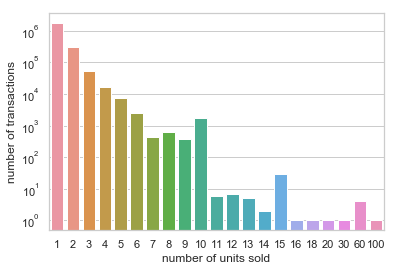

In [46]:
sns.countplot(orders['order'])
plt.yscale('log')
plt.xlabel('number of units sold')
plt.ylabel('number of transactions')

- The value counts and the above plot by themselves does not tell us much about the number of items sold. 
- To see the popularity of items, aggregation has to be done first.

In [34]:
sum_items = orders.groupby(by = 'itemID').sum()

In [55]:
sum_items.sort_values(by = 'order')

,transactID,order,salesPrice
itemID,,,
10463,2262034,1,282.16
9715,2270445,1,83.96
4821,2277621,1,33.69
4820,2275383,1,25.89
4819,2264359,1,22.48
...,...,...,...
5039,3187359915,8444,21543.41
4297,2353185494,8675,29062.80
5117,5845174608,9100,156487.53


Text(0, 0.5, 'number of items')

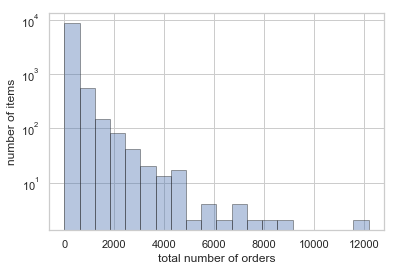

In [58]:
sns.distplot(sum_items['order'], kde = False, bins = 20, hist_kws = dict(edgecolor = "k"))
plt.yscale('log')
plt.xlabel('total number of orders')
plt.ylabel('number of items')

- Items 7789, 5035 and 5117 are the three most popular and bought products.

### Variable `salesPrice`

The variable `salesPrice_orders` is the actual price point of a product at the time of buying. This is different from `recommendedRetailPrice_items`, which is the retail price recommended by the manufacturer and `simulationPrice_infos`, which is the price of a product in the simulation period (what is the simulation period?).

In [62]:
min(orders['salesPrice']), max(orders['salesPrice'])

(0.0, 9387.02)

In [67]:
round(np.mean(orders['salesPrice']), 2), round(np.std(orders['salesPrice']), 2)

(36.68, 126.11)

Text(0, 0.5, 'Frequency')

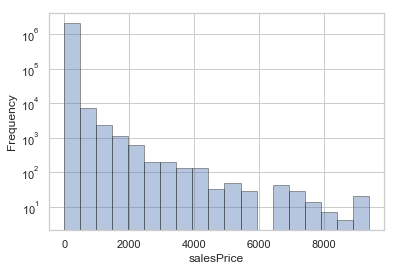

In [85]:
sns.distplot(orders['salesPrice'], kde = False, bins = 19, hist_kws = dict(edgecolor = "k"))
plt.yscale('log')
plt.ylabel('Frequency')